# Experimentation of Linear Regression Models

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error as mse
import os
import joblib

### Loading train and test sets of synthetic data and concrete compressive strength

In [2]:
cwd = os.getcwd()
data_dir = os.path.join(os.path.dirname(cwd), "data/processed")
model_dir = os.path.join(os.path.dirname(cwd), "models")
# listing all the files
data_files = os.listdir(data_dir)
model_files = os.listdir(model_dir)
print("Data Files : \n", data_files)
print("\nModel Files : \n", model_files)

Data Files : 
 ['ccs_test_scaled_x.csv', 'ccs_test_scaled_y.csv', 'ccs_train_scaled_x.csv', 'ccs_train_scaled_y.csv', 'c_test_scaled_y.csv', 'synthetic_test_scaled_x.csv', 'synthetic_test_scaled_y.csv', 'synthetic_train_scaled_x.csv', 'synthetic_train_scaled_y.csv', 'synthetic_true_beta.csv']

Model Files : 
 ['ccs_scaler_x.pkl', 'ccs_scaler_y.pkl', 'synthetic_scaler_x.pkl', 'synthetic_scaler_y.pkl']


In [3]:
# loading all the synthetic data
syn_files = ['synthetic_test_scaled_x.csv', 'synthetic_test_scaled_y.csv', 'synthetic_train_scaled_x.csv', 
             'synthetic_train_scaled_y.csv', 'synthetic_true_beta.csv']

syn_test_scaled_x, syn_test_scaled_y, syn_train_scaled_x, syn_train_scaled_y, syn_true_beta = [np.array(pd.read_csv(os.path.join(data_dir, syn_files[i])))
                                                                                                                             for i in range(5)]

# loading all the concrete compressive strength data
ccs_files = ['ccs_test_scaled_x.csv', 'ccs_test_scaled_y.csv', 'ccs_train_scaled_x.csv', 'ccs_train_scaled_y.csv']

ccs_test_scaled_x, ccs_test_scaled_y, ccs_train_scaled_x, ccs_train_scaled_y= [np.array(pd.read_csv(os.path.join(data_dir, ccs_files[i]))) for i in range(4)]

In [4]:
# loading all the scalers
ccs_scaler_x, ccs_scaler_y, synthetic_scaler_x, synthetic_scaler_y = [joblib.load(os.path.join(model_dir, model_files[i])) for i in range(4)]

## Ordinary Least Squares Experimentation

### Synthetic data

In [5]:
syn_ols = LinearRegression()
syn_ols.fit(syn_train_scaled_x, syn_train_scaled_y)
syn_ols_test_pred = syn_ols.predict(syn_test_scaled_x)
syn_ols_mse = mse(syn_test_scaled_y, syn_ols_test_pred)
syn_ols_r2_score = syn_ols.score(syn_test_scaled_x, syn_test_scaled_y)
print(f"MSE : {syn_ols_mse} \nR2 Score : {syn_ols_r2_score}")
print(f"Actual Coefficients: \n{np.array(syn_true_beta)}")
print(f"Estimated Intercept: \n{syn_ols.intercept_}")
print(f"Estimated Coefficients: \n{syn_ols.coef_}")

MSE : 0.0019372109275486045 
R2 Score : 0.9978326567085775
Actual Coefficients: 
[[-3.21747533]
 [ 0.        ]
 [-3.26519926]
 [ 0.        ]
 [ 1.37553264]
 [-0.03833616]
 [ 0.        ]
 [-2.0055649 ]
 [ 0.        ]
 [ 3.01366916]
 [ 2.66588524]
 [ 2.3361583 ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
Estimated Intercept: 
[6.42431289e-17]
Estimated Coefficients: 
[[-1.27425733e-02 -5.97751745e-01  1.49047600e-03  2.25873114e-01
  -1.23712085e-02 -5.82427479e-03 -3.67146299e-01  5.70314152e-04
   4.68363900e-01  4.53725264e-01  3.78986376e-01 -2.82841677e-03
  -1.64020631e-02  2.60845216e-03  4.54631503e-03]]


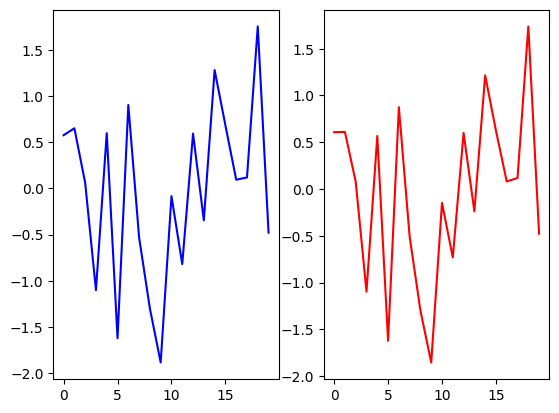

In [6]:
fig, ax = plt.subplots(1, 2)

ax[0].plot(syn_test_scaled_y, color = "blue")
ax[1].plot(syn_ols_test_pred, color = "red")

plt.show()

### Concrete Compression Strength data

In [7]:
ccs_ols = LinearRegression()
ccs_ols.fit(ccs_train_scaled_x, ccs_train_scaled_y)
ccs_ols_test_pred = ccs_ols.predict(ccs_test_scaled_x)
ccs_ols_mse = mse(ccs_test_scaled_y, ccs_ols_test_pred)
ccs_ols_r2_score = ccs_ols.score(ccs_test_scaled_x, ccs_test_scaled_y)
print(f"MSE : {ccs_ols_mse} \nR2 Score : {ccs_ols_r2_score}")
print(f"Estimated Intercept: \n{ccs_ols.intercept_}")
print(f"Estimated Coefficients: \n{ccs_ols.coef_}")

MSE : 0.4444234800359259 
R2 Score : 0.5732161868625566
Estimated Intercept: 
[2.27395861e-16]
Estimated Coefficients: 
[[ 0.72887201  0.5038337   0.31776511 -0.19967827  0.11567052  0.08493404
   0.06673234  0.44385624]]


# Ridge Regression Experimentation

### Synthetic data

In [8]:
syn_ridge = Ridge(alpha = 0.01)
syn_ridge.fit(syn_train_scaled_x, syn_train_scaled_y)
syn_ridge_test_pred = syn_ridge.predict(syn_test_scaled_x)
syn_ridge_mse = mse(syn_test_scaled_y, syn_ridge_test_pred)
syn_ridge_r2_score = syn_ridge.score(syn_test_scaled_x, syn_test_scaled_y)
print(f"MSE : {syn_ridge_mse} \nR2 Score : {syn_ridge_r2_score}")
print(f"Actual Coefficients: \n{np.array(syn_true_beta)}")
print(f"Estimated Intercept: \n{syn_ridge.intercept_}")
print(f"Estimated Coefficients: \n{syn_ridge.coef_}")

MSE : 0.0019480844470239824 
R2 Score : 0.9978204914615443
Actual Coefficients: 
[[-3.21747533]
 [ 0.        ]
 [-3.26519926]
 [ 0.        ]
 [ 1.37553264]
 [-0.03833616]
 [ 0.        ]
 [-2.0055649 ]
 [ 0.        ]
 [ 3.01366916]
 [ 2.66588524]
 [ 2.3361583 ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
Estimated Intercept: 
[6.42185766e-17]
Estimated Coefficients: 
[-1.26891265e-02 -5.97625381e-01  1.55518920e-03  2.25618563e-01
 -1.23849491e-02 -5.73434115e-03 -3.67033894e-01  5.65432805e-04
  4.68252311e-01  4.53666036e-01  3.78895495e-01 -2.79153066e-03
 -1.64654397e-02  2.68136090e-03  4.60316376e-03]


### Concrete Compressive Strength Data

In [9]:
ccs_ridge = Ridge(alpha = 0.01)
ccs_ridge.fit(ccs_train_scaled_x, ccs_train_scaled_y)
ccs_ridge_test_pred = ccs_ridge.predict(ccs_test_scaled_x)
ccs_ridge_mse = mse(ccs_test_scaled_y, ccs_ridge_test_pred)
ccs_ridge_r2_score = ccs_ridge.score(ccs_test_scaled_x, ccs_test_scaled_y)
print(f"MSE : {ccs_ridge_mse} \nR2 Score : {ccs_ridge_r2_score}")
print(f"Estimated Intercept: \n{ccs_ridge.intercept_}")
print(f"Estimated Coefficients: \n{ccs_ridge.coef_}")

MSE : 0.44442573529864327 
R2 Score : 0.5732140211137486
Estimated Intercept: 
[2.27462741e-16]
Estimated Coefficients: 
[ 0.72873647  0.50370319  0.31764889 -0.19977065  0.11566863  0.0848393
  0.06661372  0.4438441 ]


# Lasso Regression Experimentation

### Synthetic data

In [10]:
syn_lasso = Lasso(alpha = 0.01)
syn_lasso.fit(syn_train_scaled_x, syn_train_scaled_y)
syn_lasso_test_pred = syn_lasso.predict(syn_test_scaled_x)
syn_lasso_mse = mse(syn_test_scaled_y, syn_lasso_test_pred)
syn_lasso_r2_score = syn_lasso.score(syn_test_scaled_x, syn_test_scaled_y)
print(f"MSE : {syn_lasso_mse} \nR2 Score : {syn_lasso_r2_score}")
print(f"Actual Coefficients: \n{np.array(syn_true_beta)}")
print(f"Estimated Intercept: \n{syn_lasso.intercept_}")
print(f"Estimated Coefficients: \n{syn_lasso.coef_}")

MSE : 0.004034555718858743 
R2 Score : 0.9954861563360041
Actual Coefficients: 
[[-3.21747533]
 [ 0.        ]
 [-3.26519926]
 [ 0.        ]
 [ 1.37553264]
 [-0.03833616]
 [ 0.        ]
 [-2.0055649 ]
 [ 0.        ]
 [ 3.01366916]
 [ 2.66588524]
 [ 2.3361583 ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
Estimated Intercept: 
[6.3138487e-17]
Estimated Coefficients: 
[ 0.         -0.58365055  0.          0.21107639 -0.00202828  0.
 -0.35331373 -0.          0.45264696  0.4468358   0.36351117  0.
 -0.01145968  0.00178369  0.00181749]


### Concrete Compression Strength data

In [11]:
ccs_lasso = Lasso(alpha = 0.01)
ccs_lasso.fit(ccs_train_scaled_x, ccs_train_scaled_y)
ccs_lasso_test_pred = ccs_lasso.predict(ccs_test_scaled_x)
ccs_lasso_mse = mse(ccs_test_scaled_y, ccs_lasso_test_pred)
ccs_lasso_r2_score = ccs_lasso.score(ccs_test_scaled_x, ccs_test_scaled_y)
print(f"MSE : {ccs_lasso_mse} \nR2 Score : {ccs_lasso_r2_score}")
print(f"Estimated Intercept: \n{ccs_lasso.intercept_}")
print(f"Estimated Coefficients: \n{ccs_lasso.coef_}")

MSE : 0.4461974040383291 
R2 Score : 0.5715126718954795
Estimated Intercept: 
[2.75589147e-16]
Estimated Coefficients: 
[ 0.60727329  0.38277518  0.20760533 -0.26725136  0.11259232  0.
 -0.02387945  0.42496707]


# SGDRegressor Experimentation

## Linear Regression  => penalty = None

### Synthetic data

In [12]:
syn_sgd_lr = SGDRegressor(penalty = None)
syn_sgd_lr.fit(syn_train_scaled_x, syn_train_scaled_y.ravel())
syn_sgd_lr_test_pred = syn_sgd_lr.predict(syn_test_scaled_x)
syn_sgd_lr_mse = mse(syn_test_scaled_y, syn_sgd_lr_test_pred)
syn_sgd_lr_r2_score = syn_sgd_lr.score(syn_test_scaled_x, syn_test_scaled_y)
print(f"MSE : {syn_sgd_lr_mse} \nR2 Score : {syn_sgd_lr_r2_score}")
print(f"Actual Coefficients: \n{np.array(syn_true_beta)}")
print(f"Estimated Intercept: \n{syn_sgd_lr.intercept_}")
print(f"Estimated Coefficients: \n{syn_sgd_lr.coef_}")

MSE : 0.035471003728319295 
R2 Score : 0.9603151929006108
Actual Coefficients: 
[[-3.21747533]
 [ 0.        ]
 [-3.26519926]
 [ 0.        ]
 [ 1.37553264]
 [-0.03833616]
 [ 0.        ]
 [-2.0055649 ]
 [ 0.        ]
 [ 3.01366916]
 [ 2.66588524]
 [ 2.3361583 ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
Estimated Intercept: 
[-0.00019542]
Estimated Coefficients: 
[ 1.61823367e-02 -5.33235159e-01  3.75099994e-02  5.33634225e-02
 -2.24560507e-02  6.16781342e-02 -2.96268572e-01  6.80436459e-05
  4.10326507e-01  4.31282304e-01  3.33723332e-01  1.49683662e-02
 -6.11914734e-02  6.79572701e-02  4.91239242e-02]


### Concrete Compressive Strength

In [13]:
ccs_sgd_lr = SGDRegressor(penalty = None)
ccs_sgd_lr.fit(ccs_train_scaled_x, ccs_train_scaled_y.ravel())
ccs_sgd_lr_test_pred = ccs_sgd_lr.predict(ccs_test_scaled_x)
ccs_sgd_lr_mse = mse(ccs_test_scaled_y, ccs_sgd_lr_test_pred)
ccs_sgd_lr_r2_score = ccs_sgd_lr.score(ccs_test_scaled_x, ccs_test_scaled_y)
print(f"MSE : {ccs_sgd_lr_mse} \nR2 Score : {ccs_sgd_lr_r2_score}")
print(f"Estimated Coefficients: \n{ccs_sgd_lr.coef_}")

MSE : 0.46109933680324483 
R2 Score : 0.557202213573128
Estimated Coefficients: 
[ 0.5087649   0.2749215   0.12509736 -0.36337012  0.12290961 -0.07000841
 -0.1359775   0.43040688]


## Ridge Regression => penalty = "l2" 

### Synthetic data

In [14]:
syn_sgd_ridge = SGDRegressor(alpha = 0.01)
syn_sgd_ridge.fit(syn_train_scaled_x, syn_train_scaled_y.ravel())
syn_sgd_ridge_test_pred = syn_sgd_ridge.predict(syn_test_scaled_x)
syn_sgd_ridge_mse = mse(syn_test_scaled_y, syn_sgd_ridge_test_pred)
syn_sgd_ridge_r2_score = syn_sgd_ridge.score(syn_test_scaled_x, syn_test_scaled_y)
print(f"MSE : {syn_sgd_ridge_mse} \nR2 Score : {syn_sgd_ridge_r2_score}")
print(f"Actual Coefficients: \n{np.array(syn_true_beta)}")
print(f"Estimated Intercept: \n{syn_sgd_ridge.intercept_}")
print(f"Estimated Coefficients: \n{syn_sgd_ridge.coef_}")

MSE : 0.037571630300052554 
R2 Score : 0.9579650208861513
Actual Coefficients: 
[[-3.21747533]
 [ 0.        ]
 [-3.26519926]
 [ 0.        ]
 [ 1.37553264]
 [-0.03833616]
 [ 0.        ]
 [-2.0055649 ]
 [ 0.        ]
 [ 3.01366916]
 [ 2.66588524]
 [ 2.3361583 ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
Estimated Intercept: 
[-0.00037639]
Estimated Coefficients: 
[ 1.70030699e-02 -5.29721781e-01  3.95596911e-02  5.08828429e-02
 -2.29336577e-02  6.13965873e-02 -2.93830782e-01 -2.13232317e-05
  4.07071025e-01  4.27539154e-01  3.30800292e-01  1.56821109e-02
 -6.22039688e-02  6.89944883e-02  4.88626190e-02]


### Concrete Compressive Strength

In [15]:
ccs_sgd_ridge =  SGDRegressor(alpha = 0.01)
ccs_sgd_ridge.fit(ccs_train_scaled_x, ccs_train_scaled_y.reshape(-1, ))
ccs_sgd_ridge_test_pred = ccs_sgd_ridge.predict(ccs_test_scaled_x)
ccs_sgd_ridge_mse = mse(ccs_test_scaled_y, ccs_sgd_ridge_test_pred)
ccs_sgd_ridge_r2_score = ccs_sgd_ridge.score(ccs_test_scaled_x, ccs_test_scaled_y)
print(f"MSE : {ccs_sgd_ridge_mse} \nR2 Score : {ccs_sgd_ridge_r2_score}")
print(f"Estimated Coefficients: \n{ccs_sgd_ridge.coef_}")

MSE : 0.45794819169068257 
R2 Score : 0.5602282861982288
Estimated Coefficients: 
[ 0.49655296  0.27834829  0.11023019 -0.35702928  0.13309942 -0.08012781
 -0.1385635   0.42616196]


## Lasso Regression => penalty = "l1"

### Synthetic data

In [16]:
syn_sgd_lasso = SGDRegressor(penalty = "l1", alpha = 0.01, l1_ratio = 0.01)
syn_sgd_lasso.fit(syn_train_scaled_x, syn_train_scaled_y.reshape(-1, ))
syn_sgd_lasso_test_pred = syn_sgd_lasso.predict(syn_test_scaled_x)
syn_sgd_lasso_mse = mse(syn_test_scaled_y, syn_sgd_lasso_test_pred)
syn_sgd_lasso_r2_score = syn_sgd_lasso.score(syn_test_scaled_x, syn_test_scaled_y)
print(f"MSE : {syn_sgd_lasso_mse} \nR2 Score : {syn_sgd_lasso_r2_score}")
print(f"Actual Coefficients: \n{np.array(syn_true_beta)}")
print(f"Estimated Coefficients: \n{syn_sgd_lasso.coef_}")

MSE : 0.037306444405112646 
R2 Score : 0.9582617097299961
Actual Coefficients: 
[[-3.21747533]
 [ 0.        ]
 [-3.26519926]
 [ 0.        ]
 [ 1.37553264]
 [-0.03833616]
 [ 0.        ]
 [-2.0055649 ]
 [ 0.        ]
 [ 3.01366916]
 [ 2.66588524]
 [ 2.3361583 ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
Estimated Coefficients: 
[ 0.01531417 -0.52806504  0.03467248  0.05675012 -0.00904346  0.05699509
 -0.28813766  0.          0.40098801  0.42488905  0.32347313  0.00877008
 -0.05560679  0.06362965  0.04615867]


### Concrete Compressive Strength

In [17]:
ccs_sgd_lasso =  SGDRegressor(penalty = "l1", alpha = 0.01, l1_ratio = 0.01)
ccs_sgd_lasso.fit(ccs_train_scaled_x, ccs_train_scaled_y.reshape(-1, ))
ccs_sgd_lasso_test_pred = ccs_sgd_lasso.predict(ccs_test_scaled_x)
ccs_sgd_lasso_mse = mse(ccs_test_scaled_y, ccs_sgd_lasso_test_pred)
ccs_sgd_lasso_r2_score = ccs_sgd_lasso.score(ccs_test_scaled_x, ccs_test_scaled_y)
print(f"MSE : {ccs_sgd_lasso_mse} \nR2 Score : {ccs_sgd_lasso_r2_score}")
print(f"Estimated Coefficients: \n{ccs_sgd_lasso.coef_}")

MSE : 0.4549702221844168 
R2 Score : 0.5630880567512797
Estimated Coefficients: 
[ 0.48480958  0.2681286   0.08967633 -0.3306256   0.14188673 -0.06618493
 -0.12622938  0.40554984]


# Custom Linear Regression Implementations

In [18]:
# This allows .py files defined in src to be used in notebooks
import os
import sys

src_path = os.path.abspath(os.path.join('..', 'src'))

if src_path not in sys.path:
    sys.path.append(src_path)

from models import OLS, OLS_GD, Ridge, Ridge_GD, Lasso_CD
    

## Linear Regression -> Closed form

### Synthetic Data

In [19]:
from sklearn.metrics import mean_squared_error as mse, r2_score

In [20]:
syn_ols_custom = OLS()
syn_ols_custom.fit(syn_train_scaled_x, syn_train_scaled_y.reshape(-1, ))
syn_ols_custom_test_pred = syn_ols_custom.predict(syn_test_scaled_x)
syn_ols_custom_mse = mse(syn_test_scaled_y, syn_ols_custom_test_pred)
syn_ols_custom_r2_score = r2_score(syn_test_scaled_y, syn_ols_custom_test_pred)
print(f"MSE : {syn_ols_custom_mse} \nR2 Score : {syn_ols_custom_r2_score}")
print(f"Actual Coefficients: \n{np.array(syn_true_beta)}")
print(f"Estimated Coefficients: \n{syn_ols_custom.coefficients}")
print(f"Estimated Intercept: \n{syn_ols_custom.intercept}")

Final Train Loss: 0.0009
MSE : 0.0019372109275486425 
R2 Score : 0.9978326567085775
Actual Coefficients: 
[[-3.21747533]
 [ 0.        ]
 [-3.26519926]
 [ 0.        ]
 [ 1.37553264]
 [-0.03833616]
 [ 0.        ]
 [-2.0055649 ]
 [ 0.        ]
 [ 3.01366916]
 [ 2.66588524]
 [ 2.3361583 ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
Estimated Coefficients: 
[-1.27425733e-02 -5.97751745e-01  1.49047600e-03  2.25873114e-01
 -1.23712085e-02 -5.82427479e-03 -3.67146299e-01  5.70314152e-04
  4.68363900e-01  4.53725264e-01  3.78986376e-01 -2.82841677e-03
 -1.64020631e-02  2.60845216e-03  4.54631503e-03]
Estimated Intercept: 
9.040730017461695e-17


### Concrete Compression Strength Data

In [21]:
ccs_ols_custom = OLS()
ccs_ols_custom.fit(ccs_train_scaled_x, ccs_train_scaled_y.reshape(-1, ))
ccs_ols_custom_test_pred = ccs_ols_custom.predict(ccs_test_scaled_x)
ccs_ols_custom_mse = mse(ccs_test_scaled_y, ccs_ols_custom_test_pred)
ccs_ols_custom_r2_score = r2_score(ccs_test_scaled_y, ccs_ols_custom_test_pred)
print(f"MSE : {ccs_ols_custom_mse} \nR2 Score : {ccs_ols_custom_r2_score}")
print(f"Estimated Coefficients: \n{ccs_ols_custom.coefficients}")
print(f"Estimated Intercept: \n{ccs_ols_custom.intercept}")

Final Train Loss: 0.3760
MSE : 0.444423480035926 
R2 Score : 0.5732161868625565
Estimated Coefficients: 
[ 0.72887201  0.5038337   0.31776511 -0.19967827  0.11567052  0.08493404
  0.06673234  0.44385624]
Estimated Intercept: 
2.484598912291135e-16


## Linear Regression -> Gradient Descent

### Synthetic Data

In [22]:
syn_ols_gd_custom = OLS_GD()
syn_ols_gd_custom.fit(syn_train_scaled_x, syn_train_scaled_y.reshape(-1, ), 10000, 0.01)
syn_ols_gd_custom_test_pred = syn_ols_gd_custom.predict(syn_test_scaled_x)
syn_ols_gd_custom_mse = mse(syn_test_scaled_y, syn_ols_gd_custom_test_pred)
syn_ols_gd_custom_r2_score = r2_score(syn_test_scaled_y, syn_ols_gd_custom_test_pred)
print(f"MSE : {syn_ols_gd_custom_mse} \nR2 Score : {syn_ols_gd_custom_r2_score}")
print(f"Actual Coefficients: \n{np.array(syn_true_beta)}")
print(f"Estimated Coefficients: \n{syn_ols_gd_custom.coefficients}")
print(f"Estimated Intercept: \n{syn_ols_gd_custom.intercept}")

Final train loss = 0.0009
MSE : 0.0019372109275554172 
R2 Score : 0.9978326567085699
Actual Coefficients: 
[[-3.21747533]
 [ 0.        ]
 [-3.26519926]
 [ 0.        ]
 [ 1.37553264]
 [-0.03833616]
 [ 0.        ]
 [-2.0055649 ]
 [ 0.        ]
 [ 3.01366916]
 [ 2.66588524]
 [ 2.3361583 ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
Estimated Coefficients: 
[-1.27425733e-02 -5.97751745e-01  1.49047600e-03  2.25873114e-01
 -1.23712085e-02 -5.82427479e-03 -3.67146299e-01  5.70314152e-04
  4.68363900e-01  4.53725264e-01  3.78986376e-01 -2.82841677e-03
 -1.64020631e-02  2.60845216e-03  4.54631503e-03]
Estimated Intercept: 
5.115352585960411e-17


### Concrete Compression Strength Data

In [23]:
ccs_ols_gd_custom = OLS_GD()
ccs_ols_gd_custom.fit(ccs_train_scaled_x, ccs_train_scaled_y.reshape(-1, ), lr = 0.01)
ccs_ols_gd_custom_test_pred = ccs_ols_gd_custom.predict(ccs_test_scaled_x)
ccs_ols_gd_custom_mse = mse(ccs_test_scaled_y, ccs_ols_gd_custom_test_pred)
ccs_ols_gd_custom_r2_score = r2_score(ccs_test_scaled_y, ccs_ols_gd_custom_test_pred)
print(f"MSE : {ccs_ols_gd_custom_mse} \nR2 Score : {ccs_ols_gd_custom_r2_score}")
print(f"Estimated Coefficients: \n{ccs_ols_gd_custom.coefficients}")
print(f"Estimated Intercept: \n{ccs_ols_gd_custom.intercept}")

Final train loss = 0.3800
MSE : 0.4548013923152599 
R2 Score : 0.5632501855733762
Estimated Coefficients: 
[ 0.55925745  0.33982546  0.17283808 -0.33983302  0.10066343 -0.0459934
 -0.09451954  0.43740919]
Estimated Intercept: 
3.245745096639888e-16


## Ridge Regression -> Closed form

### Synthetic Data

In [24]:
syn_ridge_custom = Ridge()
syn_ridge_custom.fit(syn_train_scaled_x, syn_train_scaled_y.reshape(-1, ))
syn_ridge_custom_test_pred = syn_ridge_custom.predict(syn_test_scaled_x)
syn_ridge_custom_mse = mse(syn_test_scaled_y, syn_ridge_custom_test_pred)
syn_ridge_custom_r2_score = r2_score(syn_test_scaled_y, syn_ridge_custom_test_pred)
print(f"MSE : {syn_ridge_custom_mse} \nR2 Score : {syn_ridge_custom_r2_score}")
print(f"Actual Coefficients: \n{np.array(syn_true_beta)}")
print(f"Estimated Coefficients: \n{syn_ridge_custom.coefficients}")
print(f"Estimated Intercept: \n{syn_ridge_custom.intercept}")

Final Train Loss: 0.0009
MSE : 0.0019480844470239754 
R2 Score : 0.9978204914615443
Actual Coefficients: 
[[-3.21747533]
 [ 0.        ]
 [-3.26519926]
 [ 0.        ]
 [ 1.37553264]
 [-0.03833616]
 [ 0.        ]
 [-2.0055649 ]
 [ 0.        ]
 [ 3.01366916]
 [ 2.66588524]
 [ 2.3361583 ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
Estimated Coefficients: 
[-1.26891265e-02 -5.97625381e-01  1.55518920e-03  2.25618563e-01
 -1.23849491e-02 -5.73434115e-03 -3.67033894e-01  5.65432805e-04
  4.68252311e-01  4.53666036e-01  3.78895495e-01 -2.79153066e-03
 -1.64654397e-02  2.68136090e-03  4.60316376e-03]
Estimated Intercept: 
9.038054996216637e-17


### Concrete Compression Strength Data

In [26]:
ccs_ridge_custom = Ridge()
ccs_ridge_custom.fit(ccs_train_scaled_x, ccs_train_scaled_y.reshape(-1, ))
ccs_ridge_custom_test_pred = ccs_ridge_custom.predict(ccs_test_scaled_x)
ccs_ridge_custom_mse = mse(ccs_test_scaled_y, ccs_ridge_custom_test_pred)
ccs_ridge_custom_r2_score = r2_score(ccs_test_scaled_y, ccs_ridge_custom_test_pred)
print(f"MSE : {ccs_ridge_custom_mse} \nR2 Score : {ccs_ridge_custom_r2_score}")
print(f"Estimated Coefficients: \n{ccs_ridge_custom.coefficients}")
print(f"Estimated Intercept: \n{ccs_ridge_custom.intercept}")

Final Train Loss: 0.3760
MSE : 0.44442573529864343 
R2 Score : 0.5732140211137484
Estimated Coefficients: 
[ 0.72873647  0.50370319  0.31764889 -0.19977065  0.11566863  0.0848393
  0.06661372  0.4438441 ]
Estimated Intercept: 
2.4853192336701973e-16


## Ridge Regression -> Gradient descent

### Synthetic Data

In [27]:
syn_ridge_gd_custom = Ridge_GD()
syn_ridge_gd_custom.fit(syn_train_scaled_x, syn_train_scaled_y.reshape(-1, ))
syn_ridge_gd_custom_test_pred = syn_ridge_gd_custom.predict(syn_test_scaled_x)
syn_ridge_gd_custom_mse = mse(syn_test_scaled_y, syn_ridge_gd_custom_test_pred)
syn_ridge_gd_custom_r2_score = r2_score(syn_test_scaled_y, syn_ridge_gd_custom_test_pred)
print(f"MSE : {syn_ridge_gd_custom_mse} \nR2 Score : {syn_ridge_gd_custom_r2_score}")
print(f"Actual Coefficients: \n{np.array(syn_true_beta)}")
print(f"Estimated Coefficients: \n{syn_ridge_gd_custom.coefficients}")
print(f"Estimated Intercept: \n{syn_ridge_gd_custom.intercept}")

Final train loss = 0.0010
MSE : 0.002411533772892586 
R2 Score : 0.9973019863400567
Actual Coefficients: 
[[-3.21747533]
 [ 0.        ]
 [-3.26519926]
 [ 0.        ]
 [ 1.37553264]
 [-0.03833616]
 [ 0.        ]
 [-2.0055649 ]
 [ 0.        ]
 [ 3.01366916]
 [ 2.66588524]
 [ 2.3361583 ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
Estimated Coefficients: 
[-8.42232765e-03 -5.94848467e-01  7.73771877e-03  2.05854858e-01
 -1.43157094e-02 -2.67046406e-04 -3.64979941e-01 -1.43166868e-04
  4.66247561e-01  4.53813525e-01  3.76397332e-01  1.22062416e-03
 -2.18584834e-02  4.79244716e-03  7.34021291e-03]
Estimated Intercept: 
5.2100684877487496e-17


### Concrete Compression Strength Data

In [28]:
ccs_ridge_gd_custom = Ridge_GD()
ccs_ridge_gd_custom.fit(ccs_train_scaled_x, ccs_train_scaled_y.reshape(-1, ), lr = 0.01)
ccs_ridge_gd_custom_test_pred = ccs_ridge_gd_custom.predict(ccs_test_scaled_x)
ccs_ridge_gd_custom_mse = mse(ccs_test_scaled_y, ccs_ridge_gd_custom_test_pred)
ccs_ridge_gd_custom_r2_score = r2_score(ccs_test_scaled_y, ccs_ridge_gd_custom_test_pred)
print(f"MSE : {ccs_ridge_gd_custom_mse} \nR2 Score : {ccs_ridge_gd_custom_r2_score}")
print(f"Estimated Coefficients: \n{ccs_ridge_gd_custom.coefficients}")
print(f"Estimated Intercept: \n{ccs_ridge_gd_custom.intercept}")

Final train loss = 0.3800
MSE : 0.45480139231526 
R2 Score : 0.5632501855733761
Estimated Coefficients: 
[ 0.55925745  0.33982546  0.17283808 -0.33983302  0.10066343 -0.0459934
 -0.09451954  0.43740919]
Estimated Intercept: 
3.23312035180889e-16


## Lasso Regression -> Coordinate Descent

### Synthetic Data

In [30]:
syn_lasso_cd_custom = Lasso_CD()
syn_lasso_cd_custom.fit(syn_train_scaled_x, syn_train_scaled_y.reshape(-1, ))
syn_lasso_cd_custom_test_pred = syn_lasso_cd_custom.predict(syn_test_scaled_x)
syn_lasso_cd_custom_mse = mse(syn_test_scaled_y, syn_lasso_cd_custom_test_pred)
syn_lasso_cd_custom_r2_score = r2_score(syn_test_scaled_y, syn_lasso_cd_custom_test_pred)
print(f"MSE : {syn_sgd_lasso_mse} \nR2 Score : {syn_lasso_cd_custom_r2_score}")
print(f"Actual Coefficients: \n{np.array(syn_true_beta)}")
print(f"Estimated Coefficients: \n{syn_lasso_cd_custom.coefficients}")
print(f"Estimated Intercept: \n{syn_lasso_cd_custom.intercept}")

Final Train Loss : 0.0009
MSE : 0.037306444405112646 
R2 Score : 0.9978113211018478
Actual Coefficients: 
[[-3.21747533]
 [ 0.        ]
 [-3.26519926]
 [ 0.        ]
 [ 1.37553264]
 [-0.03833616]
 [ 0.        ]
 [-2.0055649 ]
 [ 0.        ]
 [ 3.01366916]
 [ 2.66588524]
 [ 2.3361583 ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
Estimated Coefficients: 
[-1.22521019e-02 -5.97432336e-01  1.49383078e-03  2.25067797e-01
 -1.22426467e-02 -5.34481028e-03 -3.66962619e-01  2.60277725e-04
  4.68111793e-01  4.53726599e-01  3.78729136e-01 -2.58320924e-03
 -1.62928708e-02  2.57082660e-03  4.47030067e-03]
Estimated Intercept: 
-4.874572967494828e-16


### Concrete Compression Strength Data

In [32]:
ccs_lasso_cd_custom = Lasso_CD()
ccs_lasso_cd_custom.fit(ccs_train_scaled_x, ccs_train_scaled_y.reshape(-1, ))
ccs_lasso_cd_custom_test_pred = ccs_lasso_cd_custom.predict(ccs_test_scaled_x)
ccs_lasso_cd_custom_mse = mse(ccs_test_scaled_y, ccs_lasso_cd_custom_test_pred)
ccs_lasso_cd_custom_r2_score = r2_score(ccs_test_scaled_y, ccs_lasso_cd_custom_test_pred)
print(f"MSE : {ccs_lasso_cd_custom_mse} \nR2 Score : {ccs_lasso_cd_custom_r2_score}")
print(f"Estimated Coefficients: \n{ccs_lasso_cd_custom.coefficients}")
print(f"Estimated Intercept: \n{ccs_lasso_cd_custom.intercept}")

Final Train Loss : 0.3760
MSE : 0.4444285862610935 
R2 Score : 0.5732112833091989
Estimated Coefficients: 
[ 0.72853284  0.5035003   0.31747429 -0.19993779  0.11563616  0.08466813
  0.0664118   0.44382526]
Estimated Intercept: 
9.90712366513201e-16
